# Modeling the Driving Factors of Urban Heat Disparities

We can use our models to understand the driving factors of urban heat and then leverage interpretability techniques to compare the enviromental factors of urban heat to demographic information. Here, we use an XGBoost model and then take advantage of the SHAP values to derive insights from our data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor
import shap

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Processing

In [2]:
features = ['Black', 'Hispanic', 'White', 'Below Poverty', 
            'Population Density', 'BSA', 
            'NDBI', 'NDVI', 'Spatial Lag']
label = 'UHI'

In [3]:
data = pd.read_csv('data/data.csv', usecols=features+[label])

Let's look at the missing data.

In [4]:
pd.DataFrame({'Total Missing': data.isna().sum(), 
              'Percent Missing': (data.isna().sum() / len(data)) * 100 })

,Total Missing,Percent Missing
BSA,0,0.000000
NDBI,0,0.000000
NDVI,0,0.000000
UHI,0,0.000000
Black,280,0.394917
Hispanic,280,0.394917
White,256,0.361067
Below Poverty,428,0.603659
Spatial Lag,0,0.000000
Population Density,0,0.000000


In [5]:
# We can drop the missing values or interpolate
data = data.interpolate(method='nearest')

In [31]:
# Separate the features and target
X, y = data[features], data[['UHI']]

# Split the data into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Model Development
Here, we train the model. Here, we use the scikit-learn API. If you have a more advanced appreciation for XGBoost and wish to use the default API, then feel free to do so. 

Note on hyperparameter tuning: For this specific dataset, I did not see a difference in the performance between tuning my parameters and the default parameters. There is debate on the research side of the merits of parameter tuning in academic studies. For XGBoost, there is no standard method for parameter tuning, but random search cross validation, hyperopt, and optuna are available options. As the XGBoost documentation puts it, "Parameter tuning is a dark art in machine learning, the optimal parameters of a model can depend on many scenarios". 

Now, let's train the model.
1. Update the number of estimators parameter *n_estimators*. Feel free to play arond with other hyperparameters too.
2. Use the *fit* method with the training data.

In [32]:
# Train a model using the scikit-learn API
## YOUR CODE HERE

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

*Congratulations!* You just trained a machine learning model! Now let's see how well it performs.

In [8]:
# Make predictions with the test set
## YOUR CODE HERE

In [18]:
# Evaluate the RMSE and R^2 with the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

In [19]:
rmse, r2

(1.297232757372087, 0.8824358791366629)

## Model Interpretation
Let's use the SHAP API to interpret our model.

In [33]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

### SHAP Bar and Beeswarm
[SHAP Bar Plots](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html)

[SHAP Beeswarm Plots](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html)

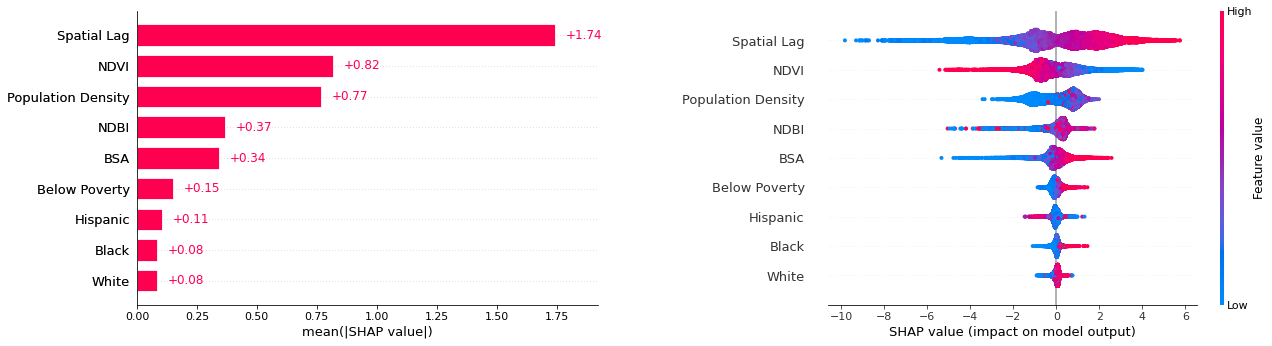

In [25]:
# Create a SHAP bar and beeswarm plot
## YOUR CODE HERE

### SHAP Scatter Plots
[SHAP Scatter Plots](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/scatter.html)

Create a SHAP scatter plot by race. Show the interaction effect of poverty.

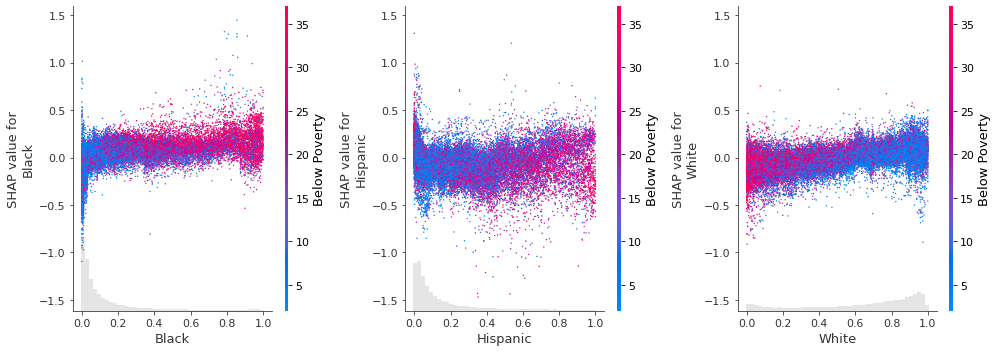

In [26]:
## YOUR CODE HERE

Create a SHAP scatter plot by race. Show the interaction effect of NDBI, NDVI, BSA, and population density.

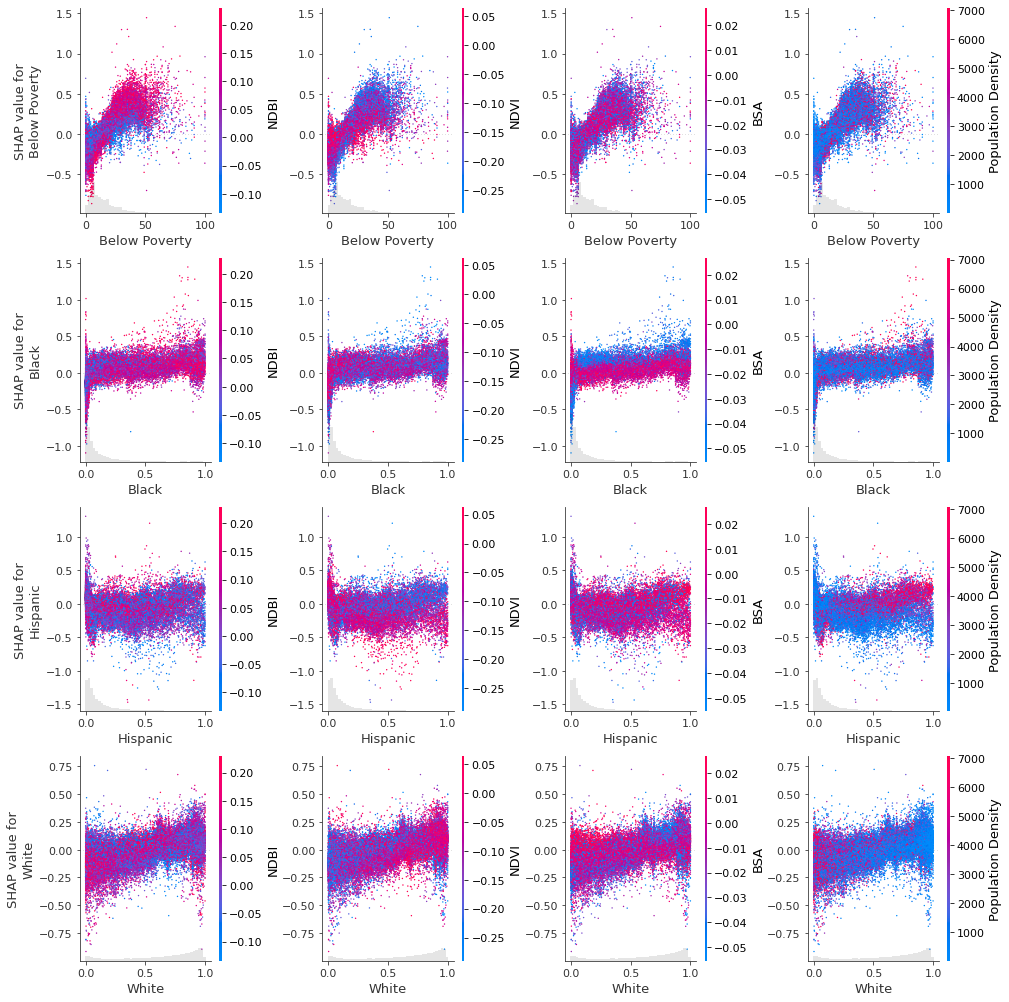

In [27]:
## YOUR CODE HERE